# script for generating powder diffraction pattern

In [255]:
import numpy as np  # numpy is a package to use for arrays
import matplotlib.pyplot as plt # to make plot
import math
import pandas as pd

In [273]:
# all three data are loaded
# but you can annotate lines in order to only load one set of data, same as later
cubedata = pd.read_table('out.q',header=None,index_col=False)
podata = np.loadtxt('out.powder')
debyedata = np.loadtxt('out.debye')
wavelength = 0.6

In [274]:
# if you load the cubic data, then this line is needed to calculate the average
cube_av=cubedata.groupby(0,axis=0,as_index=False).mean()

In [275]:
podata.shape
debyedata.shape
cube_av.shape

(6553, 2)

In [276]:
intensity = cube_av[1]
# q stands for result from the cubic q's
q = cube_av[0]
powderintensity = podata[:,2]
# powderq stands for result from powder method
powderq = podata[:,1]
debyeintensity = debyedata[:,1]
# debyeq stands for results coming from calculating the debye equation
debyeq = debyedata[:,0]

Text(0.5, 0, '$2\\theta$')

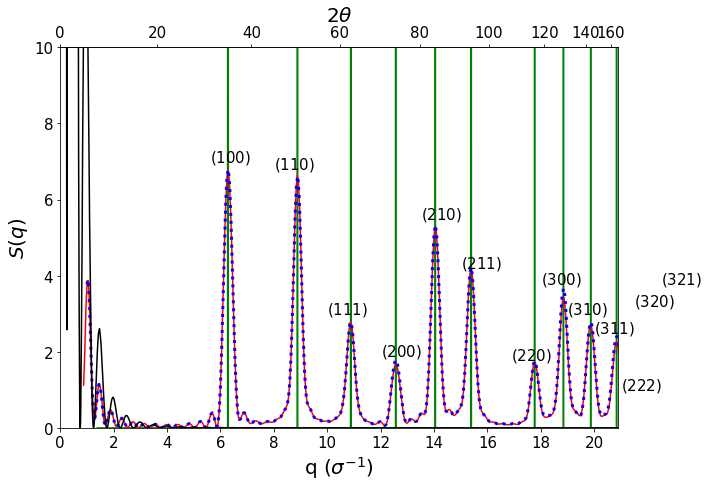

In [277]:
fig,ax = plt.subplots(figsize=(10,7))
# this parameter cut2 is to disregard the first ten values, which are usually too large and meaningless
cut2 = 10
ax.plot(q[cut2:],intensity[cut2:],'g')
ax.plot(powderq[cut2:],powderintensity[cut2:],color='r')
ax.plot(debyeq[cut2:],debyeintensity[cut2:],color='b',ls=':',linewidth=3)
plt.ylim(0,10)
plt.xlim(0,20.9)
plt.xlabel("q ($\sigma^{-1}$)",fontsize=20) # set the x-axis label
plt.ylabel(r'$S(q)$',fontsize=20) # set the y-axis label
# the range for axis should be modified, by changing the numbers below
plt.xticks(np.arange(0,20.9,2.0),fontsize=15)
plt.yticks(fontsize=15)

# the two functions below is to convert q values into angle values
# since it is common practice to use angle value as the axis

def f1(x):
    return 2 * np.arcsin(x * wavelength / 4 / np.pi) * 180 / np.pi


def f2(x):
    return 4 * np.pi / wavelength * np.sin(x / 2 * np.pi / 180)

secax = ax.secondary_xaxis('top', functions=(f1, f2))
secax.set_xticklabels(range(0,180,20),fontsize=15)
secax.set_xlabel(r'$2\theta$',fontsize=20)
# save the figure, change the name here
fig.savefig('figfcc', dpi = 300,bbox_inches='tight')